In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/alvaroromangomez/Documents/Documentos personales/Formación/Master Bioinformática y Estadística/TFM/tfm_alvaro/Codigo/notebooks':
  os.chdir(r'/Users/alvaroromangomez/Documents/Documentos personales/Formación/Master Bioinformática y Estadística/TFM/tfm_alvaro/Codigo/notebooks')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/3s/vv1d0lmn7g134m4psncn2_q80000gn/T/ipykernel_13753/1603051704.py:20: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



{"/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/importlib/_bootstrap.py": 1680292077.4164195, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/importlib/_bootstrap_external.py": 1680292077.4196162, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/codecs.py": 1680292075.8375273, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/encodings/aliases.py": 1680292076.6626852, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/encodings/__init__.py": 1680292076.6596105, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/encodings/utf_8.py": 1680292077.0363183, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/abc.py": 1680292075.7900312, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/io.py": 1680292075.9434319, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/stat.py": 1680292076.0992587, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/_collection

In [2]:
# PATH TO CUSTOM MODULES
import sys

sys.path.append("../src")

# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MODELS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    roc_curve,
    auc,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    average_precision_score,
)

import glob
import os

# IMPORT CUSTOM MODULES
import utils.loadDataUtils as ldu
import utils.modelsUtils as mu

In [3]:
# DIRECTORIES
input_path = "../data/processed/"
training_path = input_path + "train_data/"
test_path = input_path + "test_data/"
results_path = "../models/results/"

In [4]:
# FILES

# RESULTS FILE
results_file = "results_table.csv"

In [5]:
# GET TRAINING AND TEST CSV FILES
training_csv_files = ldu.get_csv_files(training_path)
test_csv_files = ldu.get_csv_files(test_path)

# GET DATASET NAMES FROM CSV FILES
dataset_names = ldu.get_dataset_names(training_csv_files)

# LOAD TRAINING AND TEST DATA
datasets = ldu.load_training_test_datasets(
    datasets_names=dataset_names, training_path=training_path, test_path=test_path
)

In [6]:
parameters_grids = list()
moldel_names = list()

In [7]:
k_range = range(1, 101, 10)
distance_range = ["euclidean", "minkowski", "manhattan", "chebyshev", "jaccard"]
k_weight_range = ["uniform", "distance"]
parameters_grid_knn = dict(
    n_neighbors=k_range, metric=distance_range, weights=k_weight_range
)
model_name = "k-NN"

parameters_grids.append(parameters_grid_knn)
moldel_names.append(model_name)

In [8]:
nb_var_smoothing = np.logspace(0, -9, num=100)
parameters_grid_naive_bayes = dict(
    var_smoothing=nb_var_smoothing,
)
model_name = "Naive_Bayes"

parameters_grids.append(parameters_grid_naive_bayes)
moldel_names.append(model_name)

In [9]:
parameters_grid_svm = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [0.1, 1, 10, 100, 1000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
}
model_name = "SVM"

parameters_grids.append(parameters_grid_svm)
moldel_names.append(model_name)

In [10]:
parameters_grid_random_forest = {
    "n_estimators": [10, 50, 100],
    "max_depth": [5, 10, 50],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [5, 10, 50],
    "max_features": ["sqrt", "log2"],
}
model_name = "Random_Forest"

parameters_grids.append(parameters_grid_random_forest)
moldel_names.append(model_name)

In [11]:
xgboost_n_estimators = [1, 10, 50, 100]
xgboost_max_depth = [3, 5, 10]
xgboost_learning_rate = [0.01, 0.1]
xgboost_gamma = [0, 0.1, 0.4]
xgboost_colsample_bytree = [0.3]
xgboost_subsample = [0.3]
xgboost_reg_alpha = [0, 0.1]
xgboost_reg_lambda = [0.1]

parameters_grid_xgboost = {
    "n_estimators": [10, 50, 100],
    "max_depth": [5, 10, 50],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [5, 10, 50],
    "max_features": ["sqrt", "log2"],
}
model_name = "XGBoost"

parameters_grids.append(parameters_grid_xgboost)
moldel_names.append(model_name)

In [12]:
parameters_grid_logistic_regression = {
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "C": [0.1, 1, 10, 100, 1000],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "max_iter": [100, 1000, 2500, 5000],
}
model_name = "Logistic_Regression"

parameters_grids.append(parameters_grid_logistic_regression)
moldel_names.append(model_name)

In [13]:
parameters_grid_ada_boost = {
    "n_estimators": [10, 50, 100],
    "learning_rate": [0.01, 0.1, 1],
    "algorithm": ["SAMME", "SAMME.R"],
}
model_name = "Ada_Boost"

parameters_grids.append(parameters_grid_ada_boost)
moldel_names.append(model_name)

In [14]:
models = list()

knn_model = KNeighborsClassifier()
models.append(knn_model)

naive_bayes_model = GaussianNB()
models.append(naive_bayes_model)

svm_model = SVC()
models.append(svm_model)

random_forest_model = RandomForestClassifier()
models.append(random_forest_model)

xgboost_model = XGBClassifier()
models.append(xgboost_model)

logistic_regression_model = LogisticRegression()
models.append(logistic_regression_model)

ada_boost_model = AdaBoostClassifier()
models.append(ada_boost_model)

In [15]:
models_results = dict()

for i in range(len(models)):
    model = models[i]
    parameters_grid = parameters_grids[i]
    model_name = moldel_names[i]

    model_results = mu.calculate_models(
        model=model,
        parameters_grid=parameters_grid,
        datasets=datasets,
        model_name=model_name,
    )

    results = model_results[0]
    roc_curves = model_results[1]

    # OPEN FILE
    file = open(results_path + results_file, "a")
    # REMOVE ROWS IN TABLE_RESULTS.CSV THAT STARTS WITH k-NN
    table_results = pd.read_csv(results_path + results_file)
    table_results = table_results[
        ~table_results["model_name"].str.startswith(model_name)
    ]
    table_results.to_csv(results_path + results_file, index=False)
    # WRITE RESULTS
    results.to_csv(file, header=False, index=False)
    # CLOSE FILE
    file.close()

    models_results[model_name] = roc_curves

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/a

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/a

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning:

Data was converted to boolean for metric jaccard



Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/a

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Fitting 5 folds for each of 162 candidates, totalling 810 fits


Fitting 5 folds for each of 162 candidates, totalling 810 fits


Fitting 5 folds for each of 162 candidates, totalling 810 fits


Fitting 5 folds for each of 162 candidates, totalling 810 fits


Fitting 5 folds for each of 162 candidates, totalling 810 fits


Fitting 5 folds for each of 162 candidates, totalling 810 fits


[17:30:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[17:30:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:30:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:30:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:30:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:30:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:08] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.



Fitting 5 folds for each of 162 candidates, totalling 810 fits


[17:30:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:30:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:30:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:30:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:30:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:30:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:32:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[17:31:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:31:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:31:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9

[17:35:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.



Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past beha

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: C

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means th

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


900 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.sol

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated 

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: User

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: Conve

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 an

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated 

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: Conve

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvar

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means th

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 an

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: User

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 an

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated 

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvar

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: User

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, s

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: User

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increas

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: User

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increas

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: User

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: User

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvar

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


900 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.sol

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means th

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: Futu

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviou

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increas

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


900 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
----------------------------------------------------------

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvar

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 an

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: User

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: Futu

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Convergenc

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated 

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Convergenc

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past beha

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: Futu

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means th

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 an

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvar

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvar

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: User

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvar

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: User

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvar

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: User

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvar

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/p

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the 

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: User

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvar

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


900 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimato

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: User

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: Futu

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past beha

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvar

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvar

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated 

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated 

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: User

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvar

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: User

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvar

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvar

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behavi

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvar

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaror

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


900 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alvaroromangomez/.local/share/virtualenvs/tfm_alvaro-vnpVahGc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.sol

Fitting 5 folds for each of 18 candidates, totalling 90 fits


Fitting 5 folds for each of 18 candidates, totalling 90 fits


Fitting 5 folds for each of 18 candidates, totalling 90 fits


Fitting 5 folds for each of 18 candidates, totalling 90 fits


Fitting 5 folds for each of 18 candidates, totalling 90 fits


k-NN
[                       model_name       fpr  tpr   auc
0  k-NN_molecular_descriptors_pca  0.000000  0.0  0.62
1  k-NN_molecular_descriptors_pca  0.366667  0.6  0.62
2  k-NN_molecular_descriptors_pca  1.000000  1.0  0.62,                           model_name       fpr  tpr   auc
0  k-NN_molecular_descriptors_filter  0.000000  0.0  0.72
1  k-NN_molecular_descriptors_filter  0.366667  0.8  0.72
2  k-NN_molecular_descriptors_filter  1.000000  1.0  0.72,                                      model_name       fpr  tpr   auc
0  k-NN_molecular_descriptors_genetic_selection  0.000000  0.0  0.77
1  k-NN_molecular_descriptors_genetic_selection  0.166667  0.7  0.77
2  k-NN_molecular_descriptors_genetic_selection  1.000000  1.0  0.77,         model_name       fpr       tpr  auc
0  k-NN_maccs_keys  0.000000  0.000000  0.7
1  k-NN_maccs_keys  0.419355  0.827586  0.7
2  k-NN_maccs_keys  1.000000  1.000000  0.7,                 model_name       fpr       tpr   auc
0  k-NN_ecfp4_fingerprints  0.000

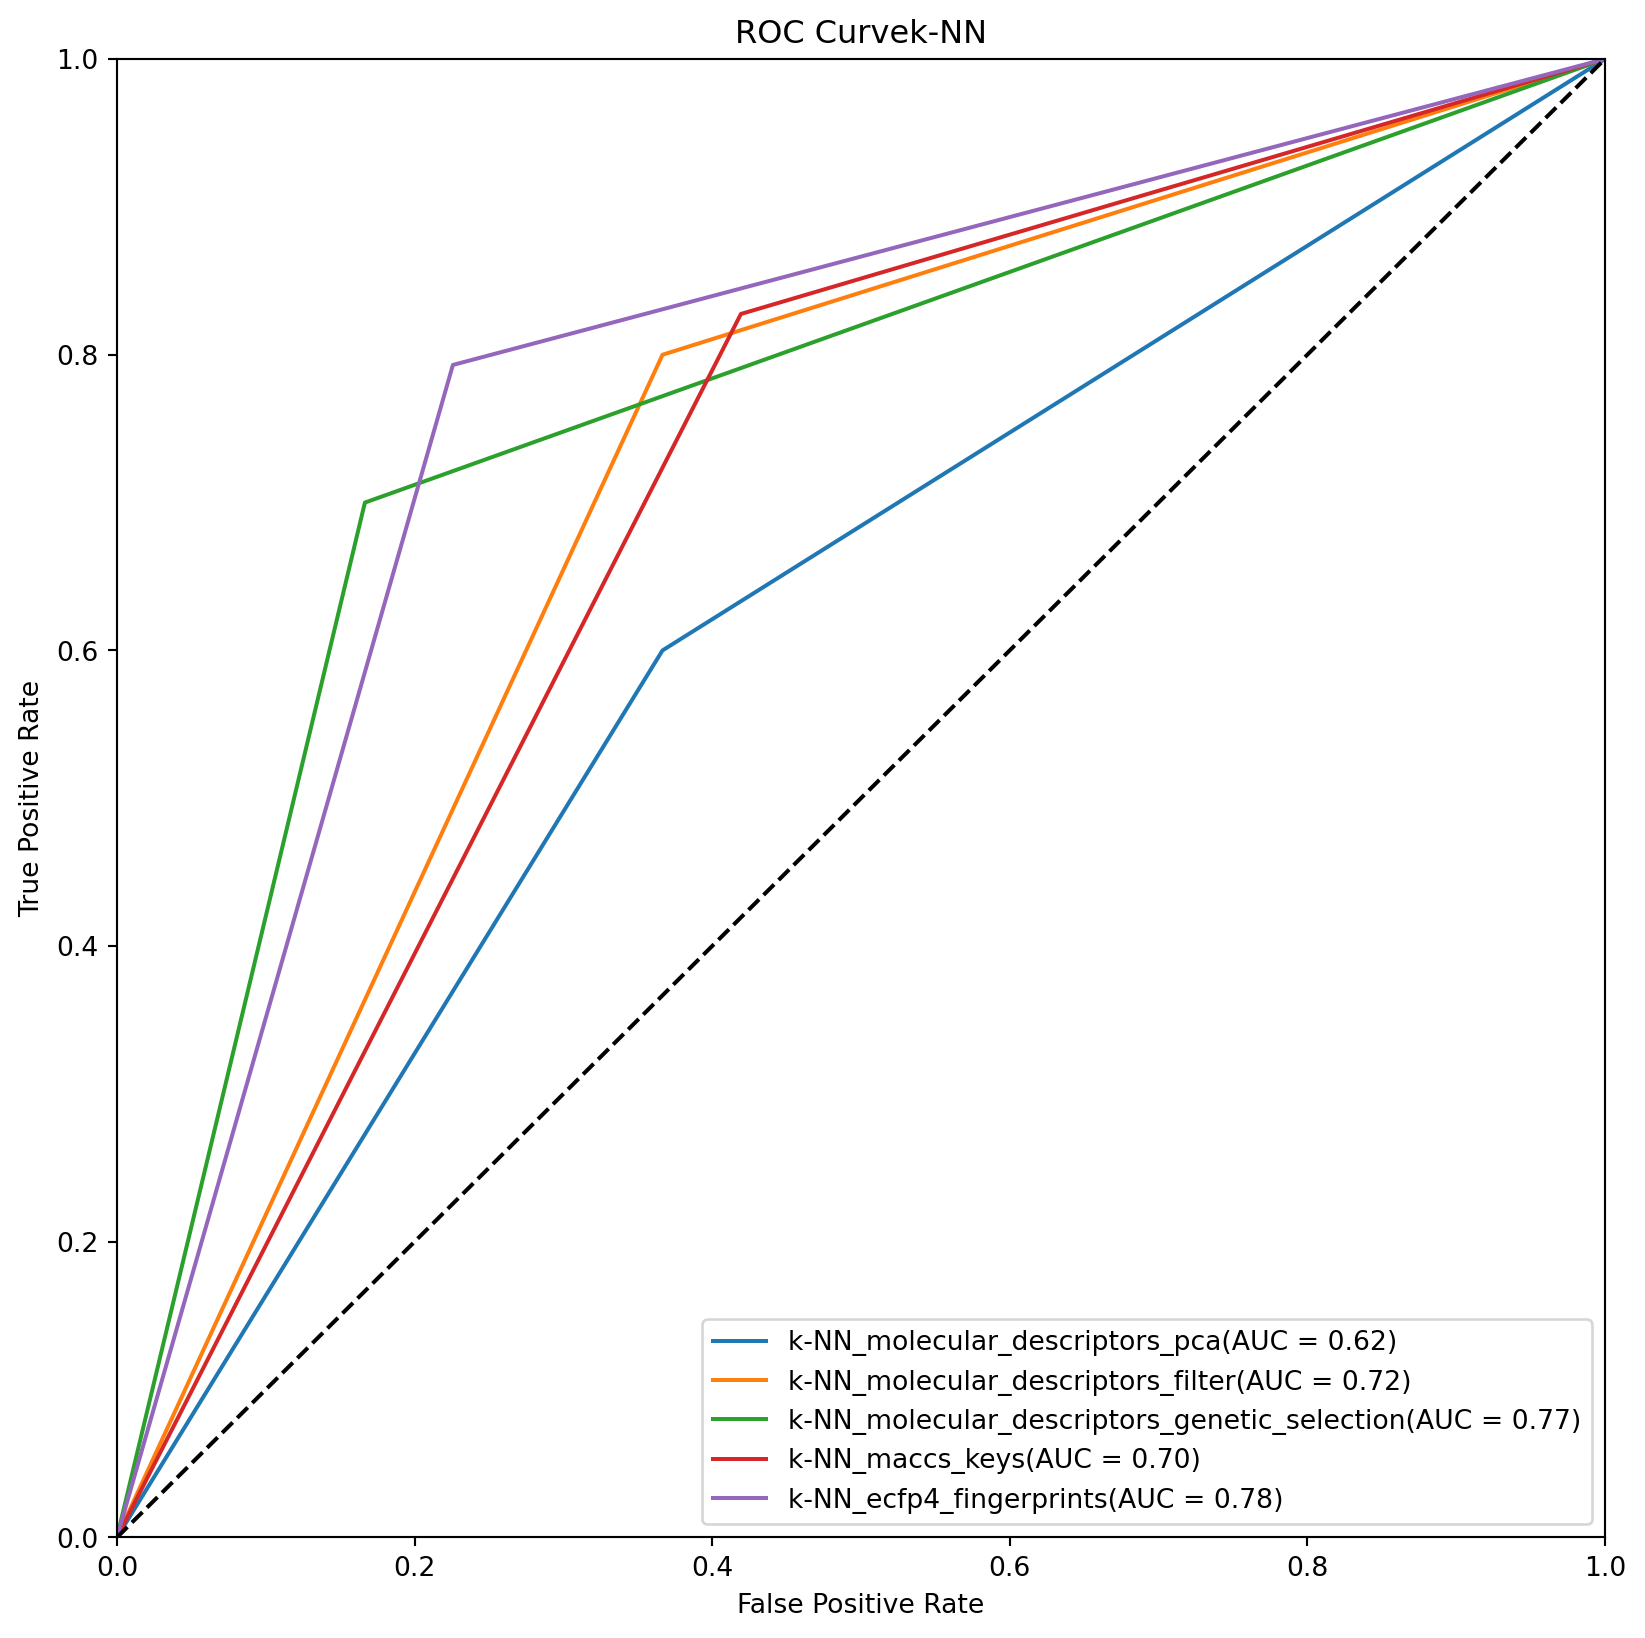

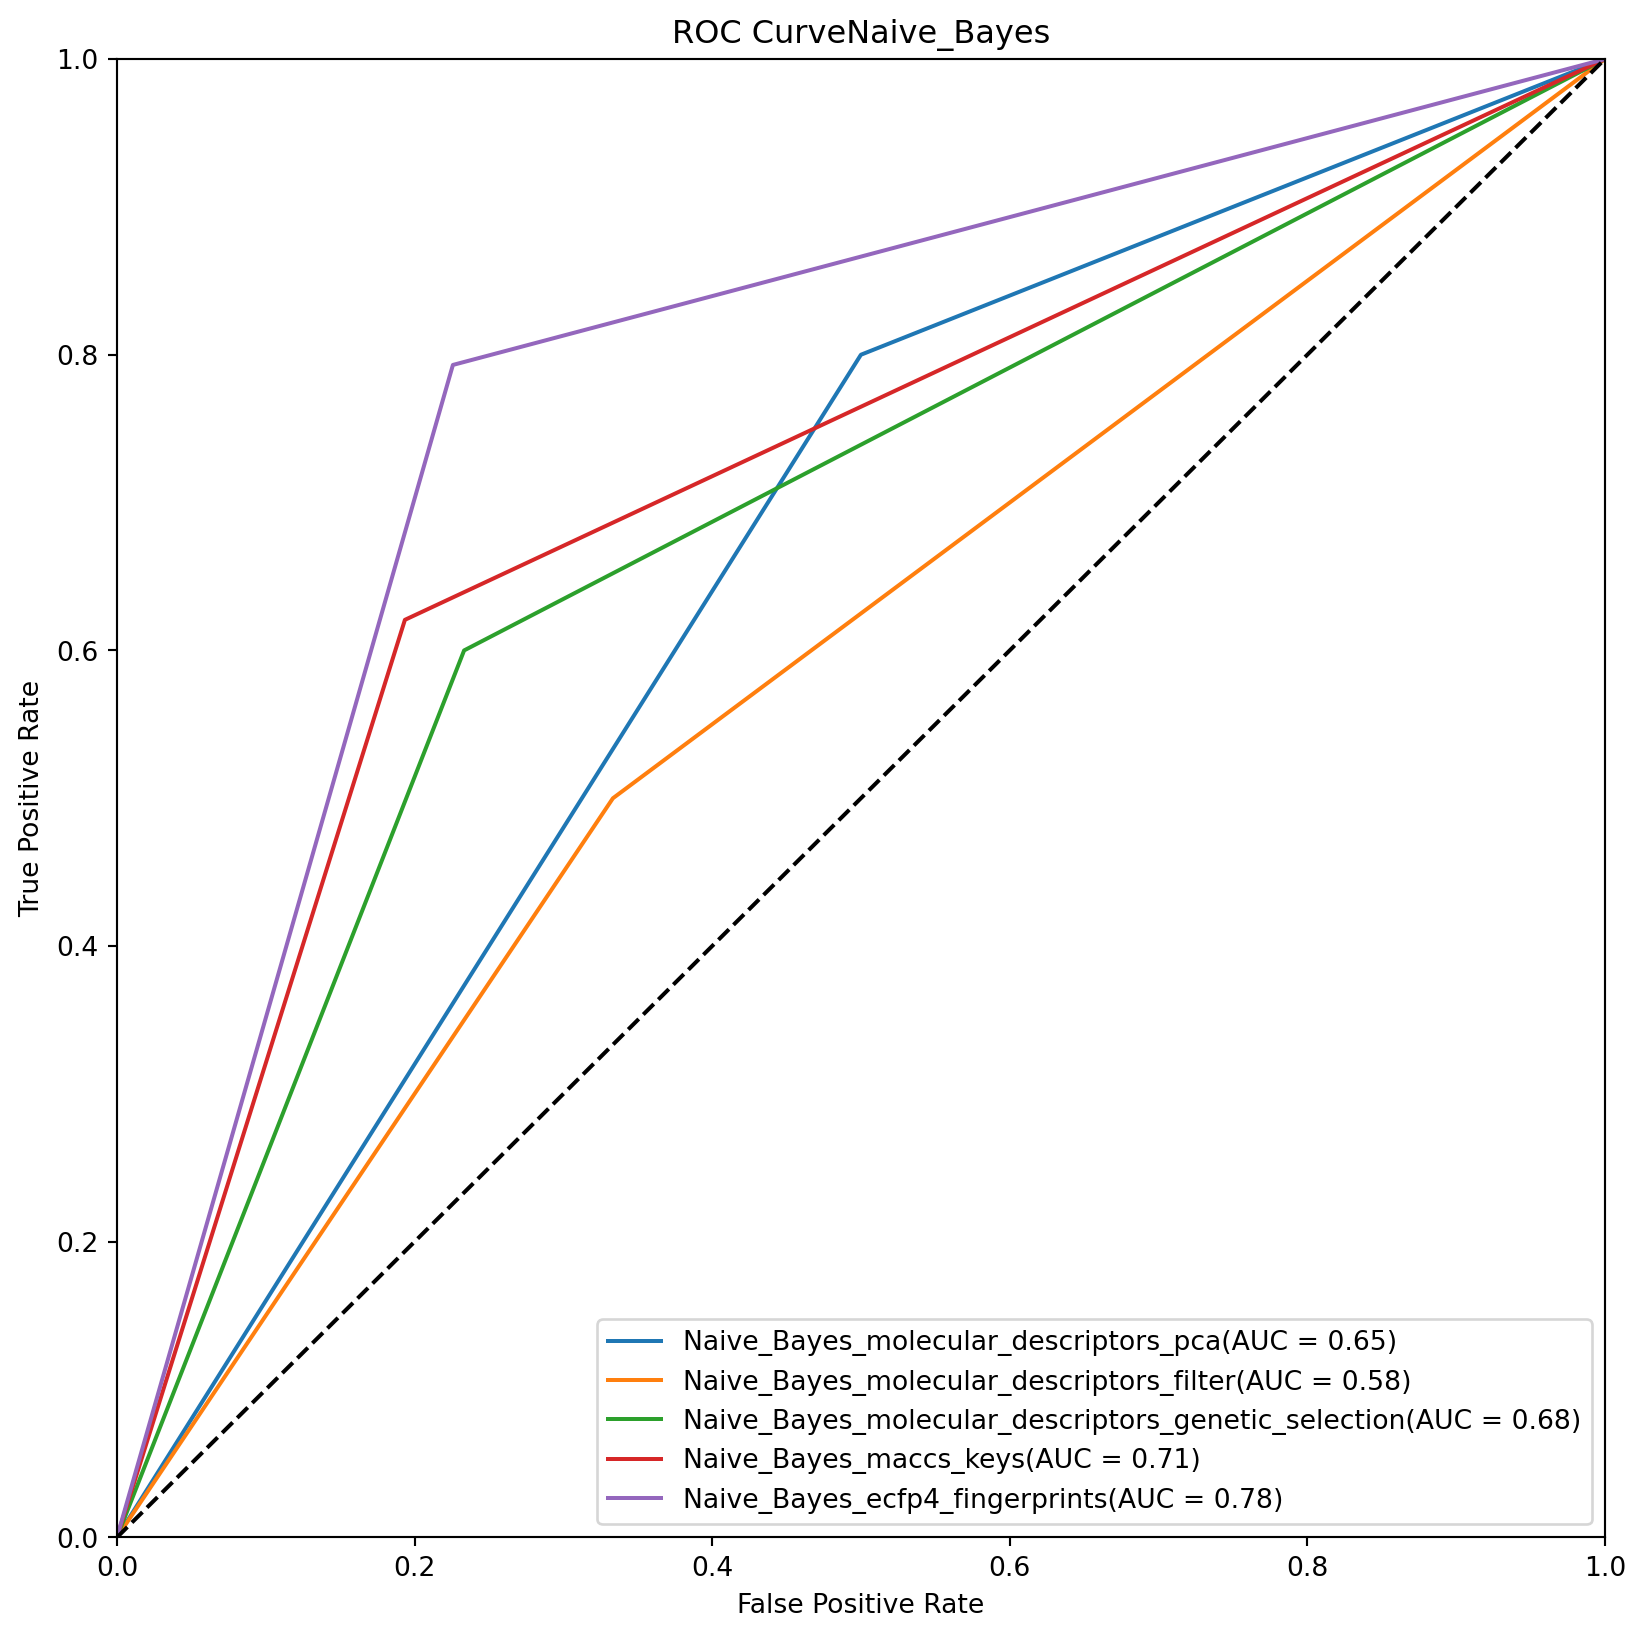

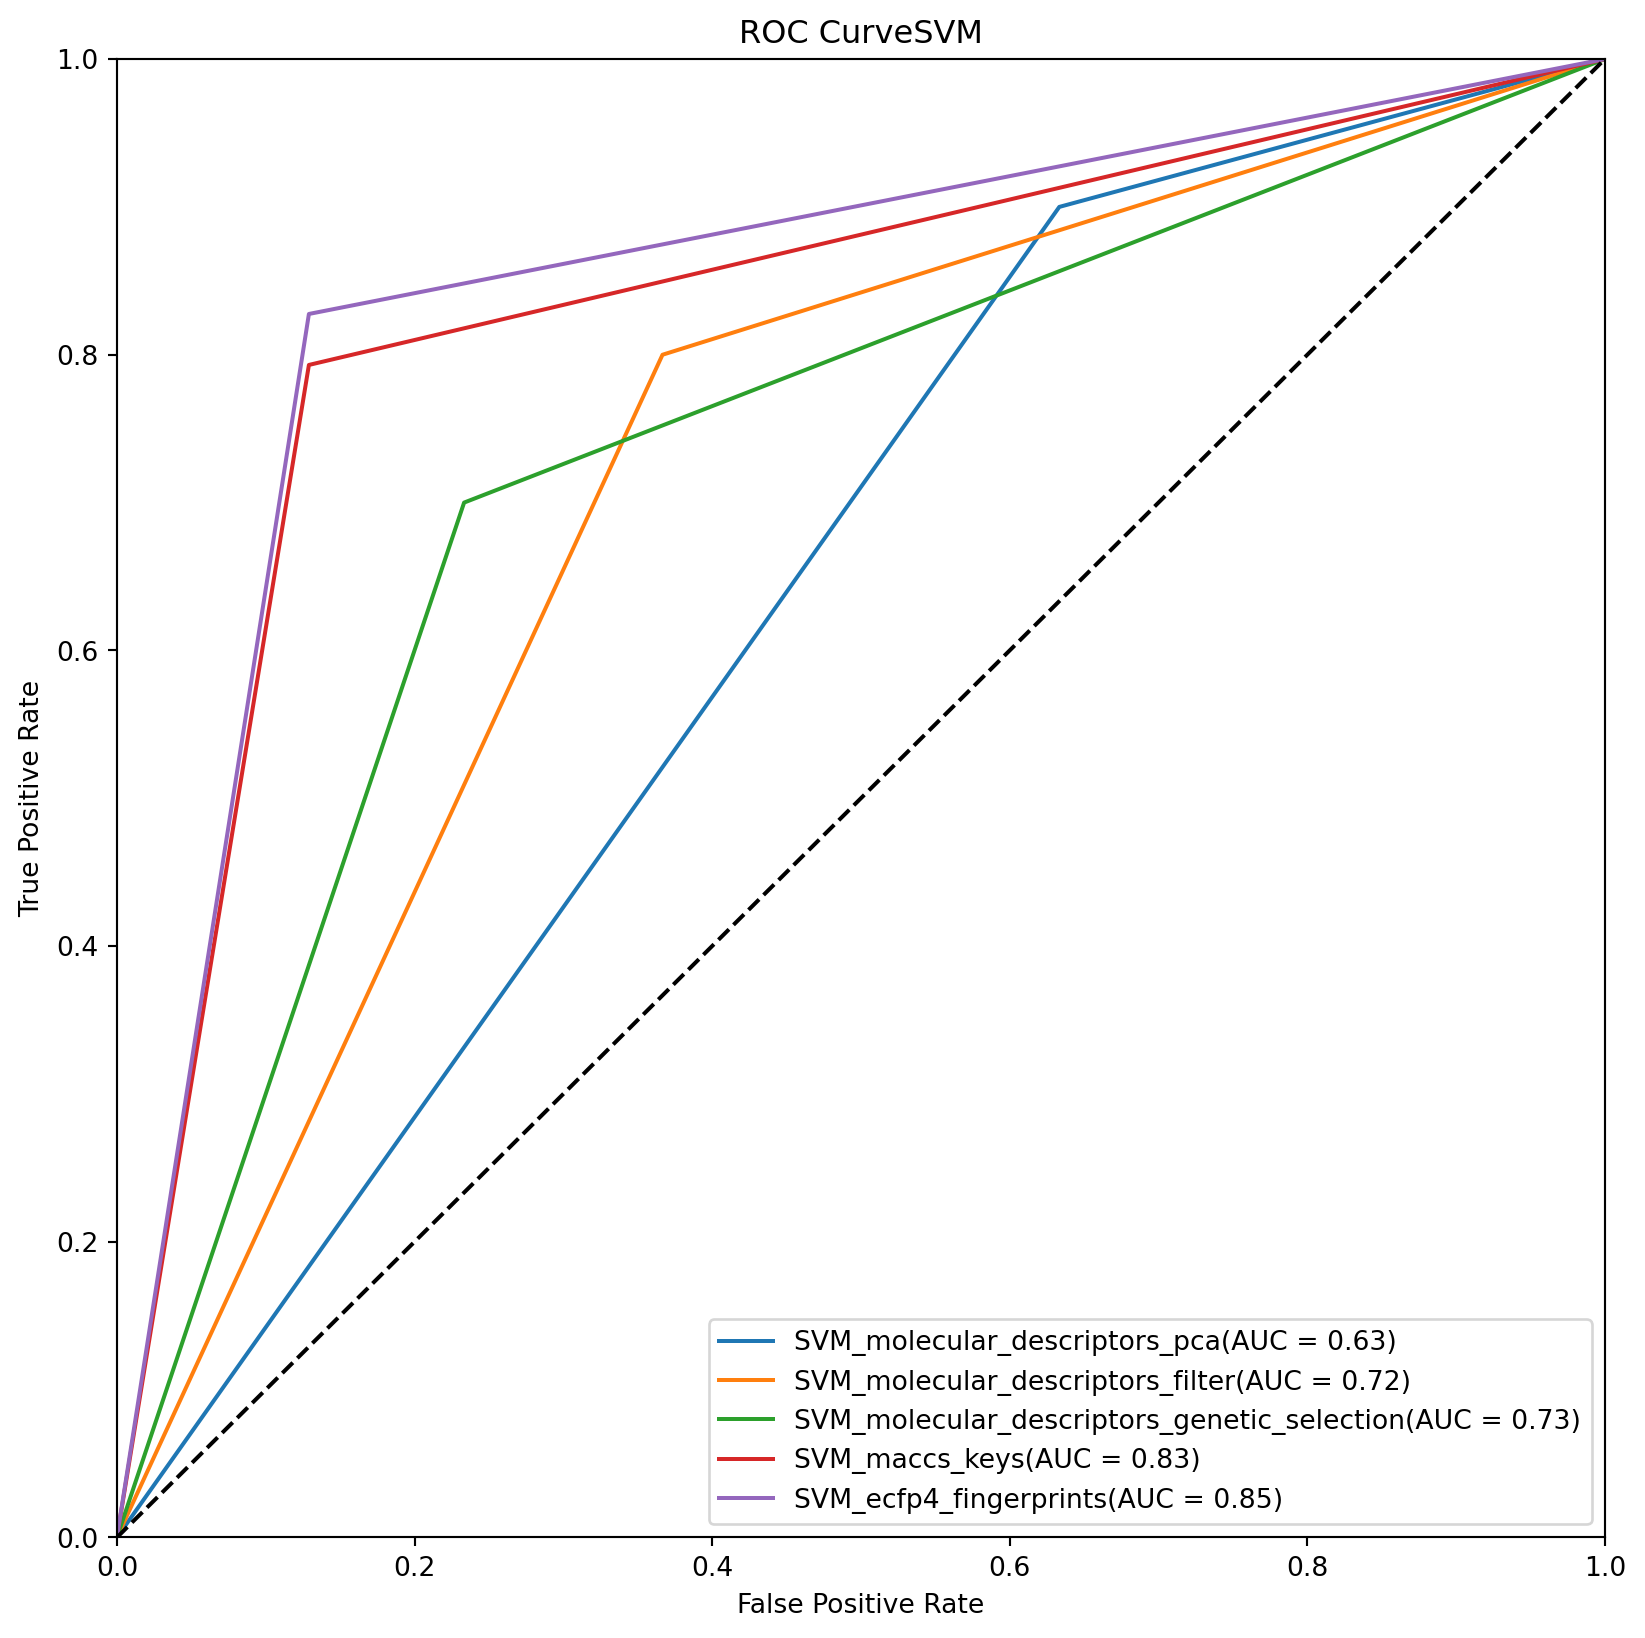

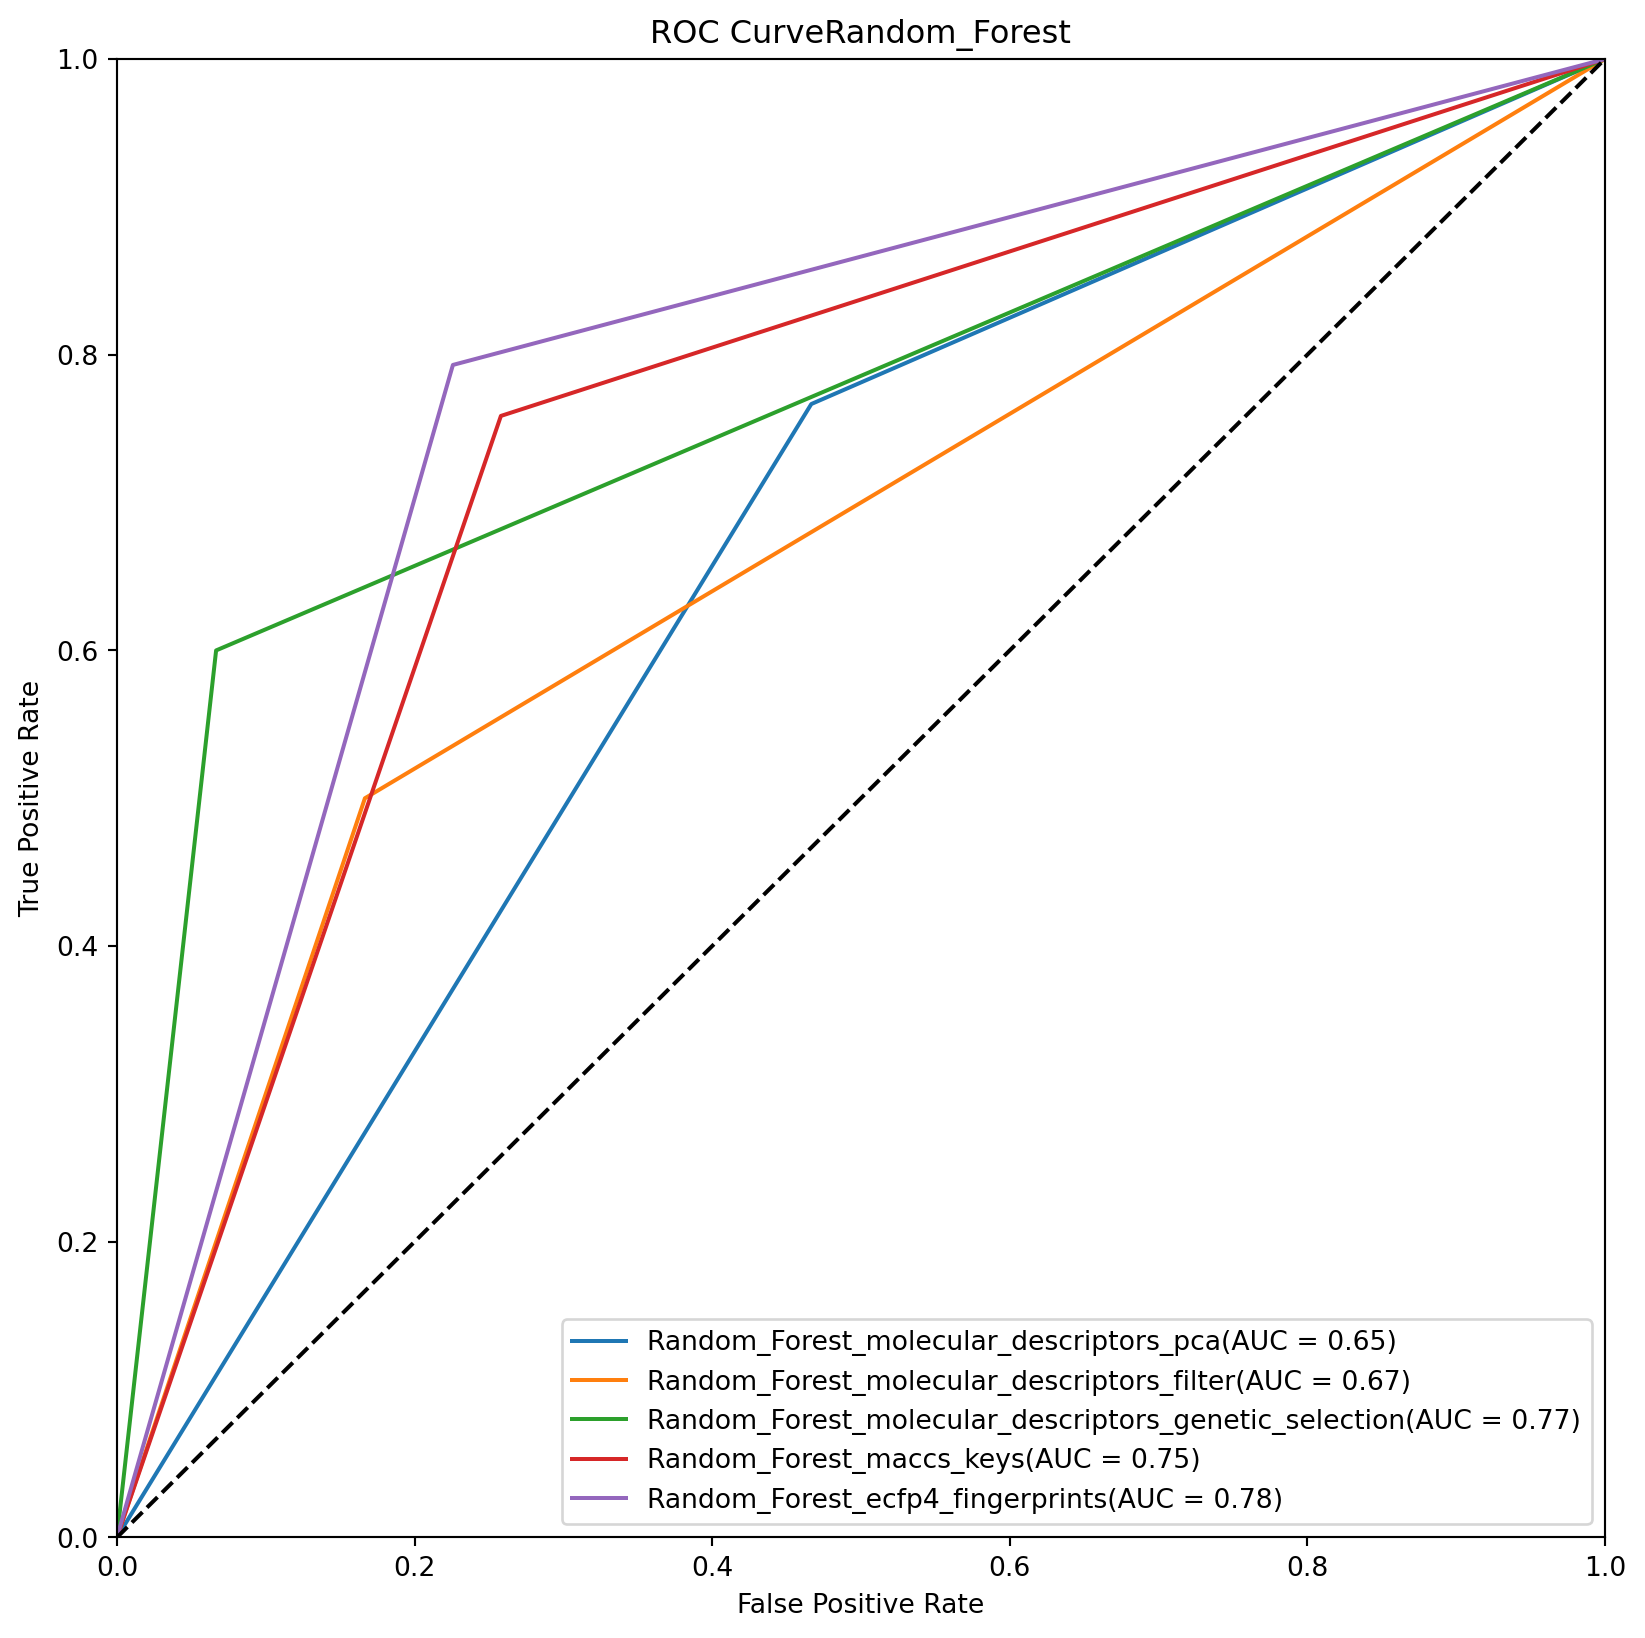

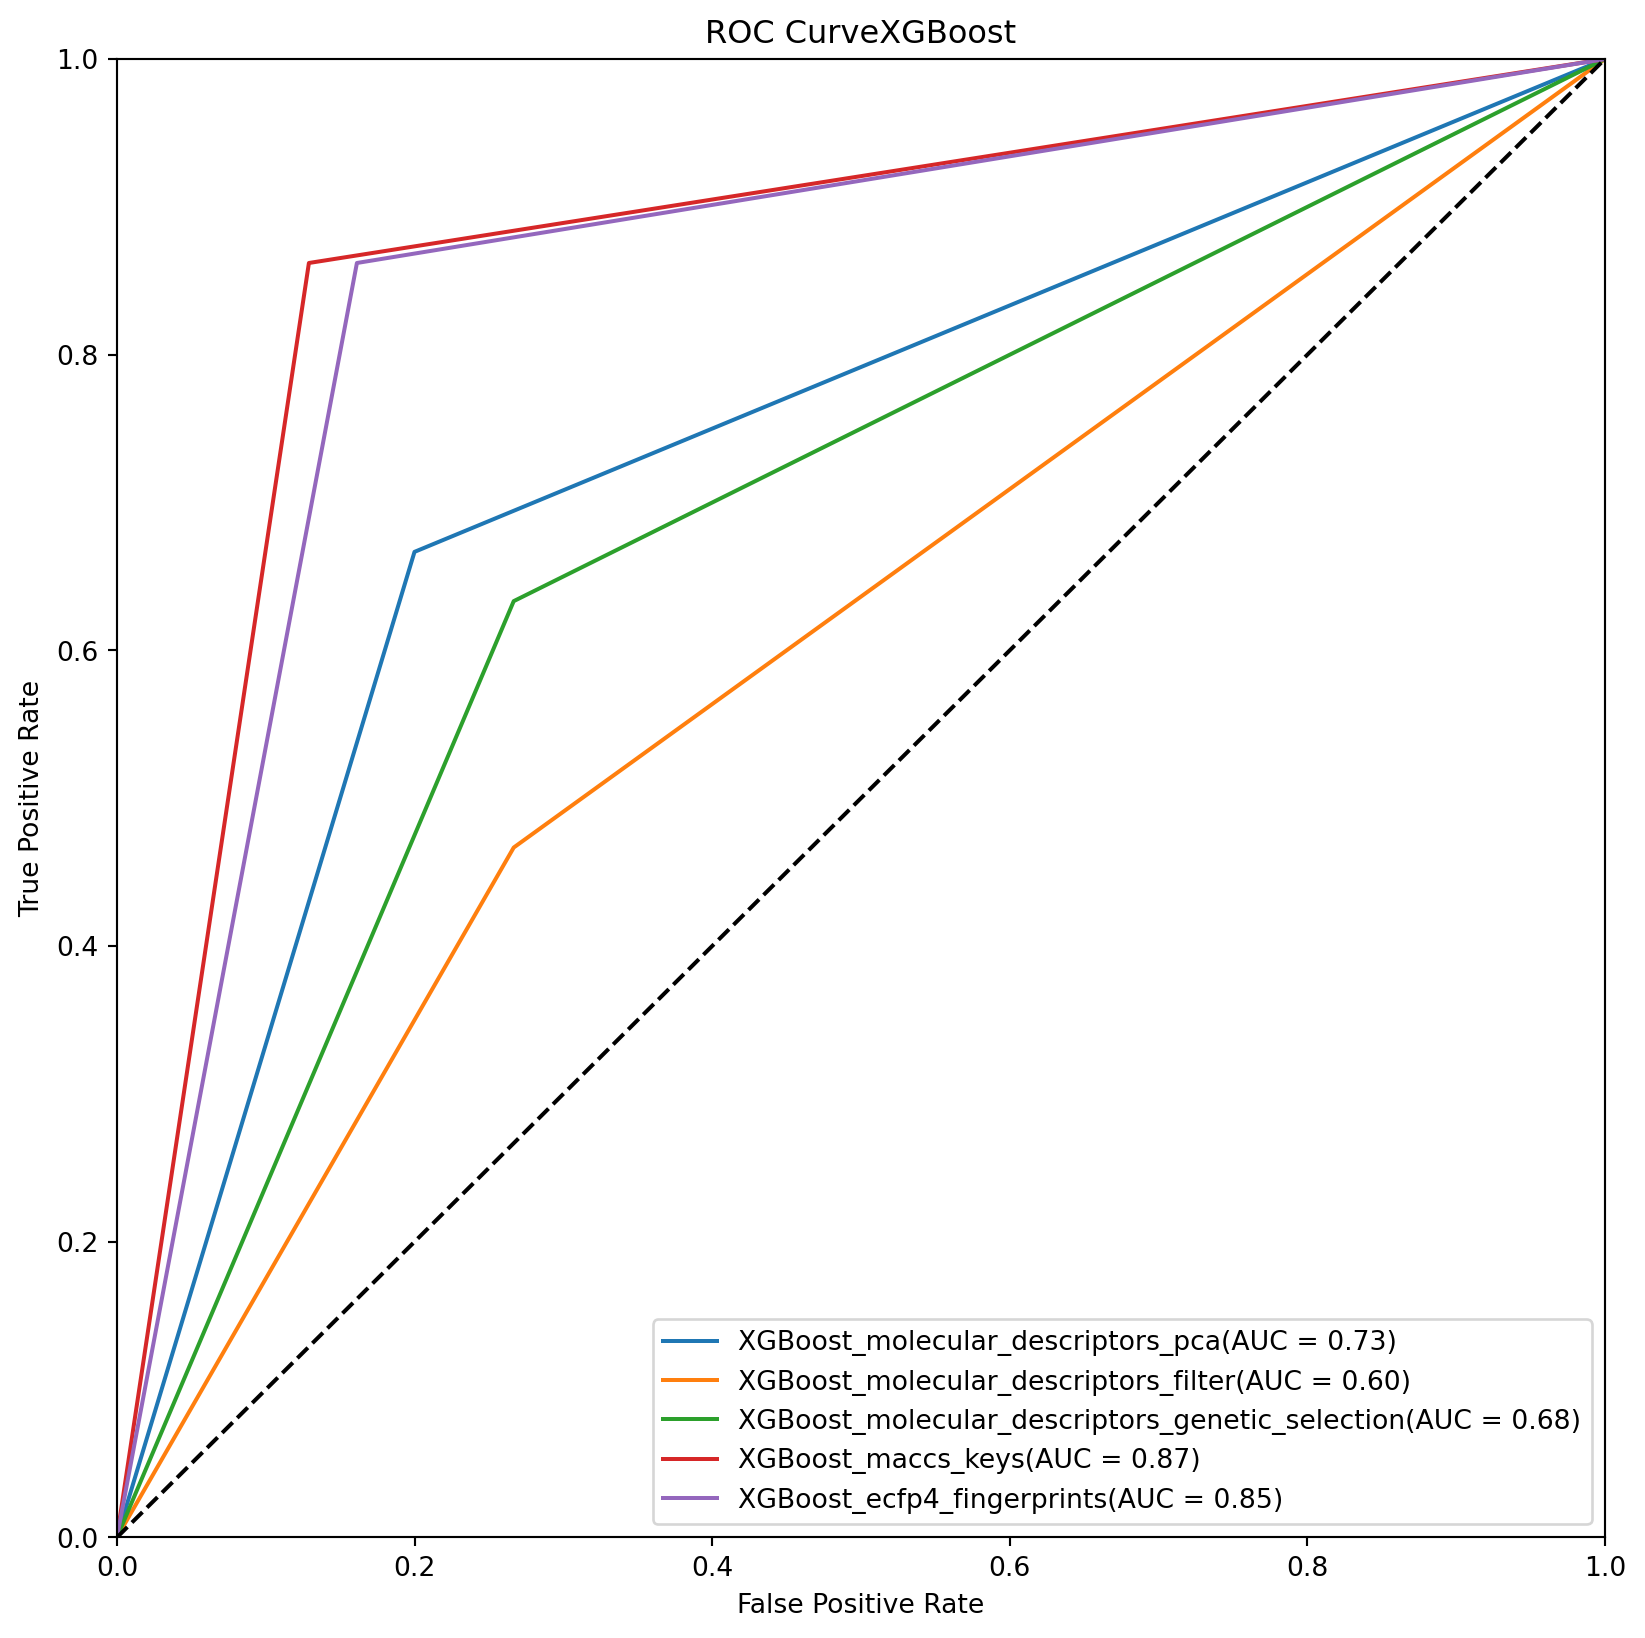

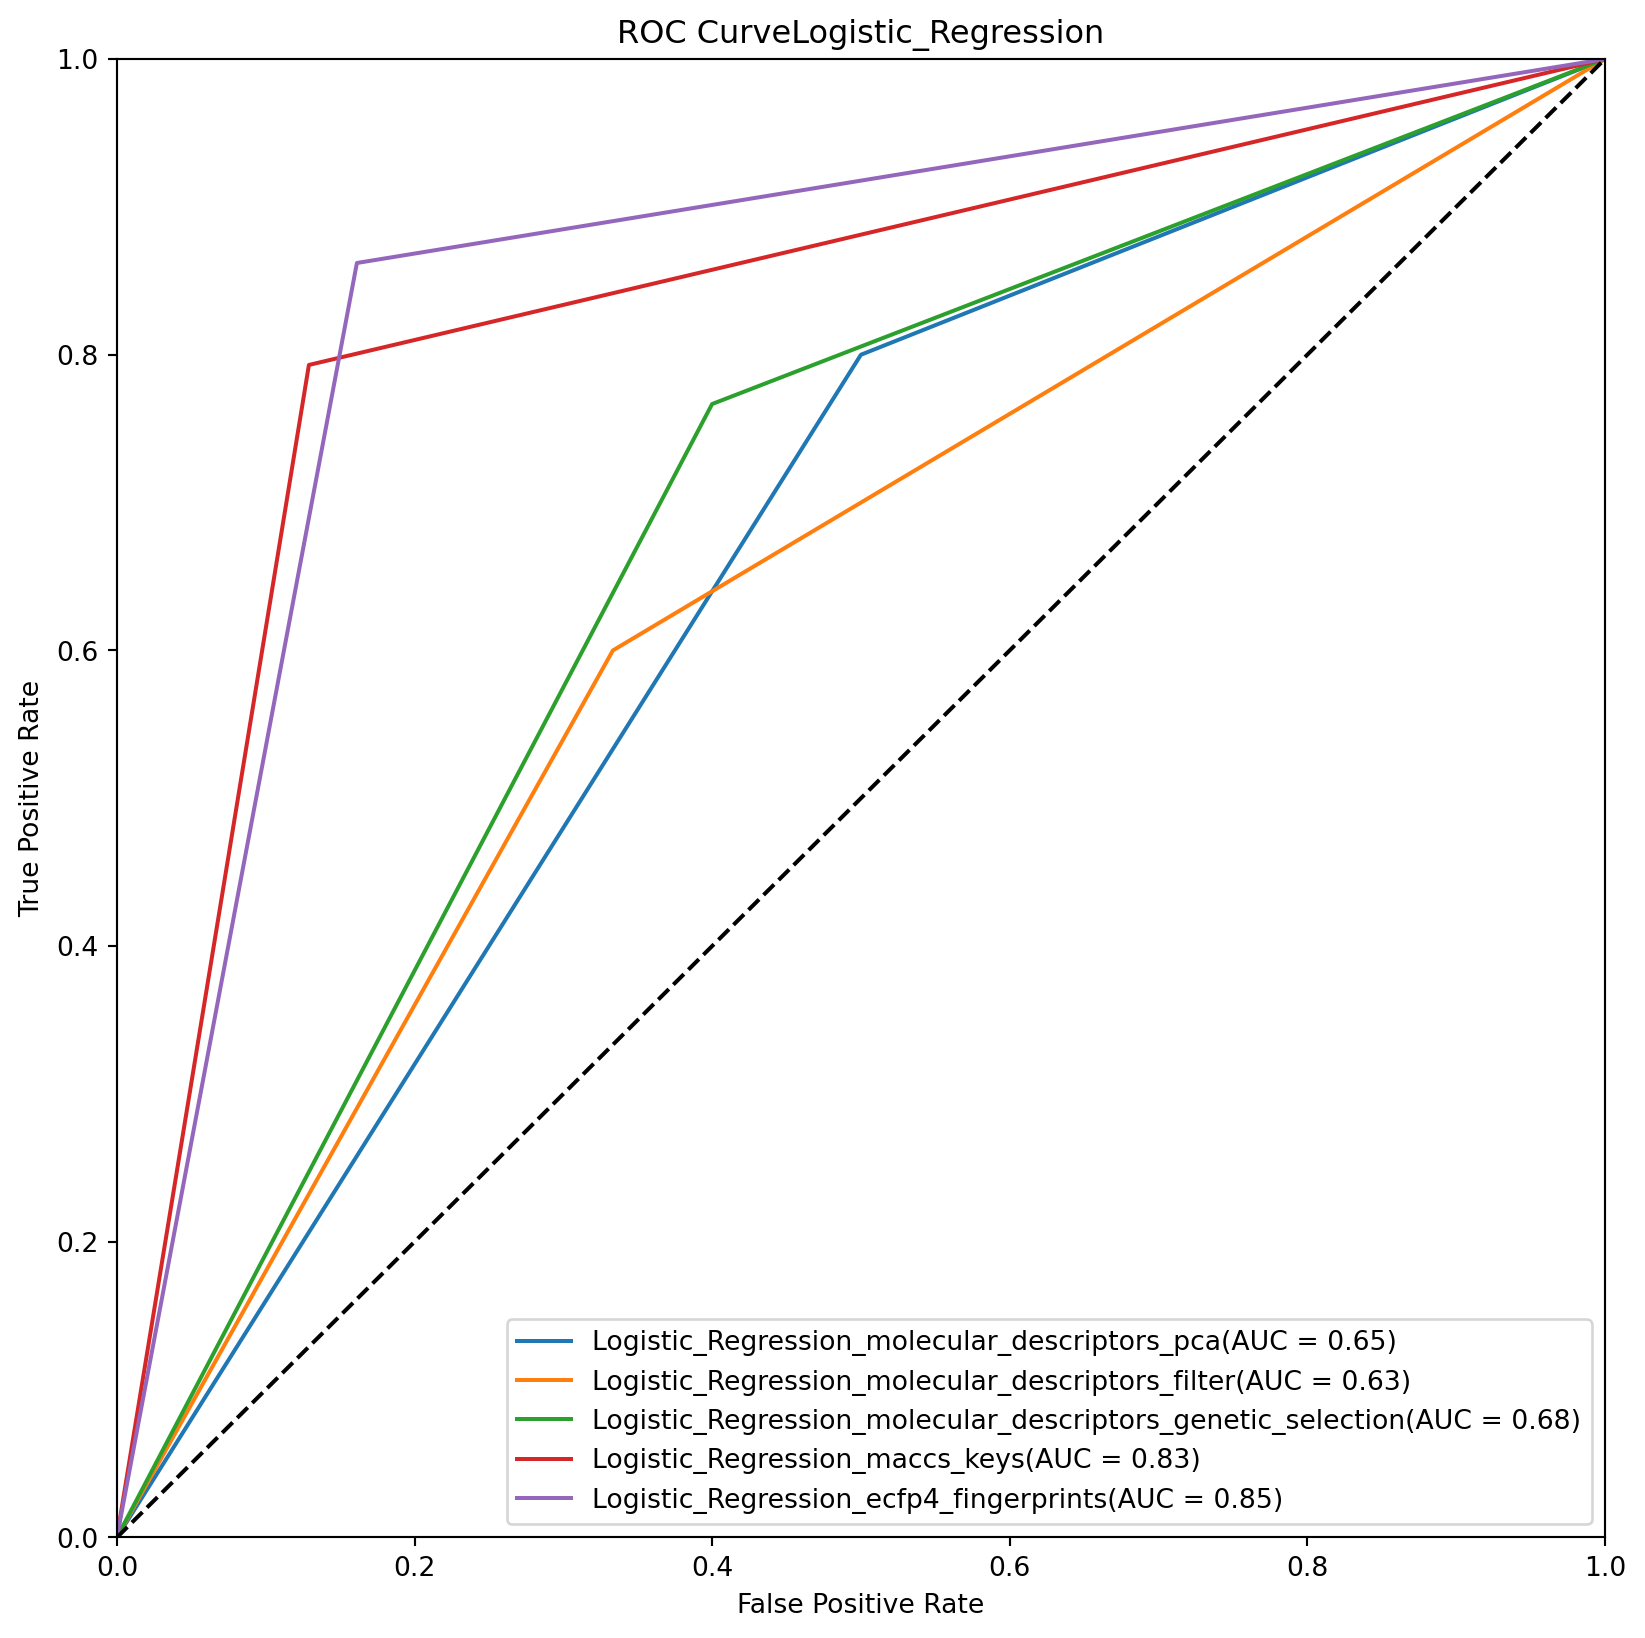

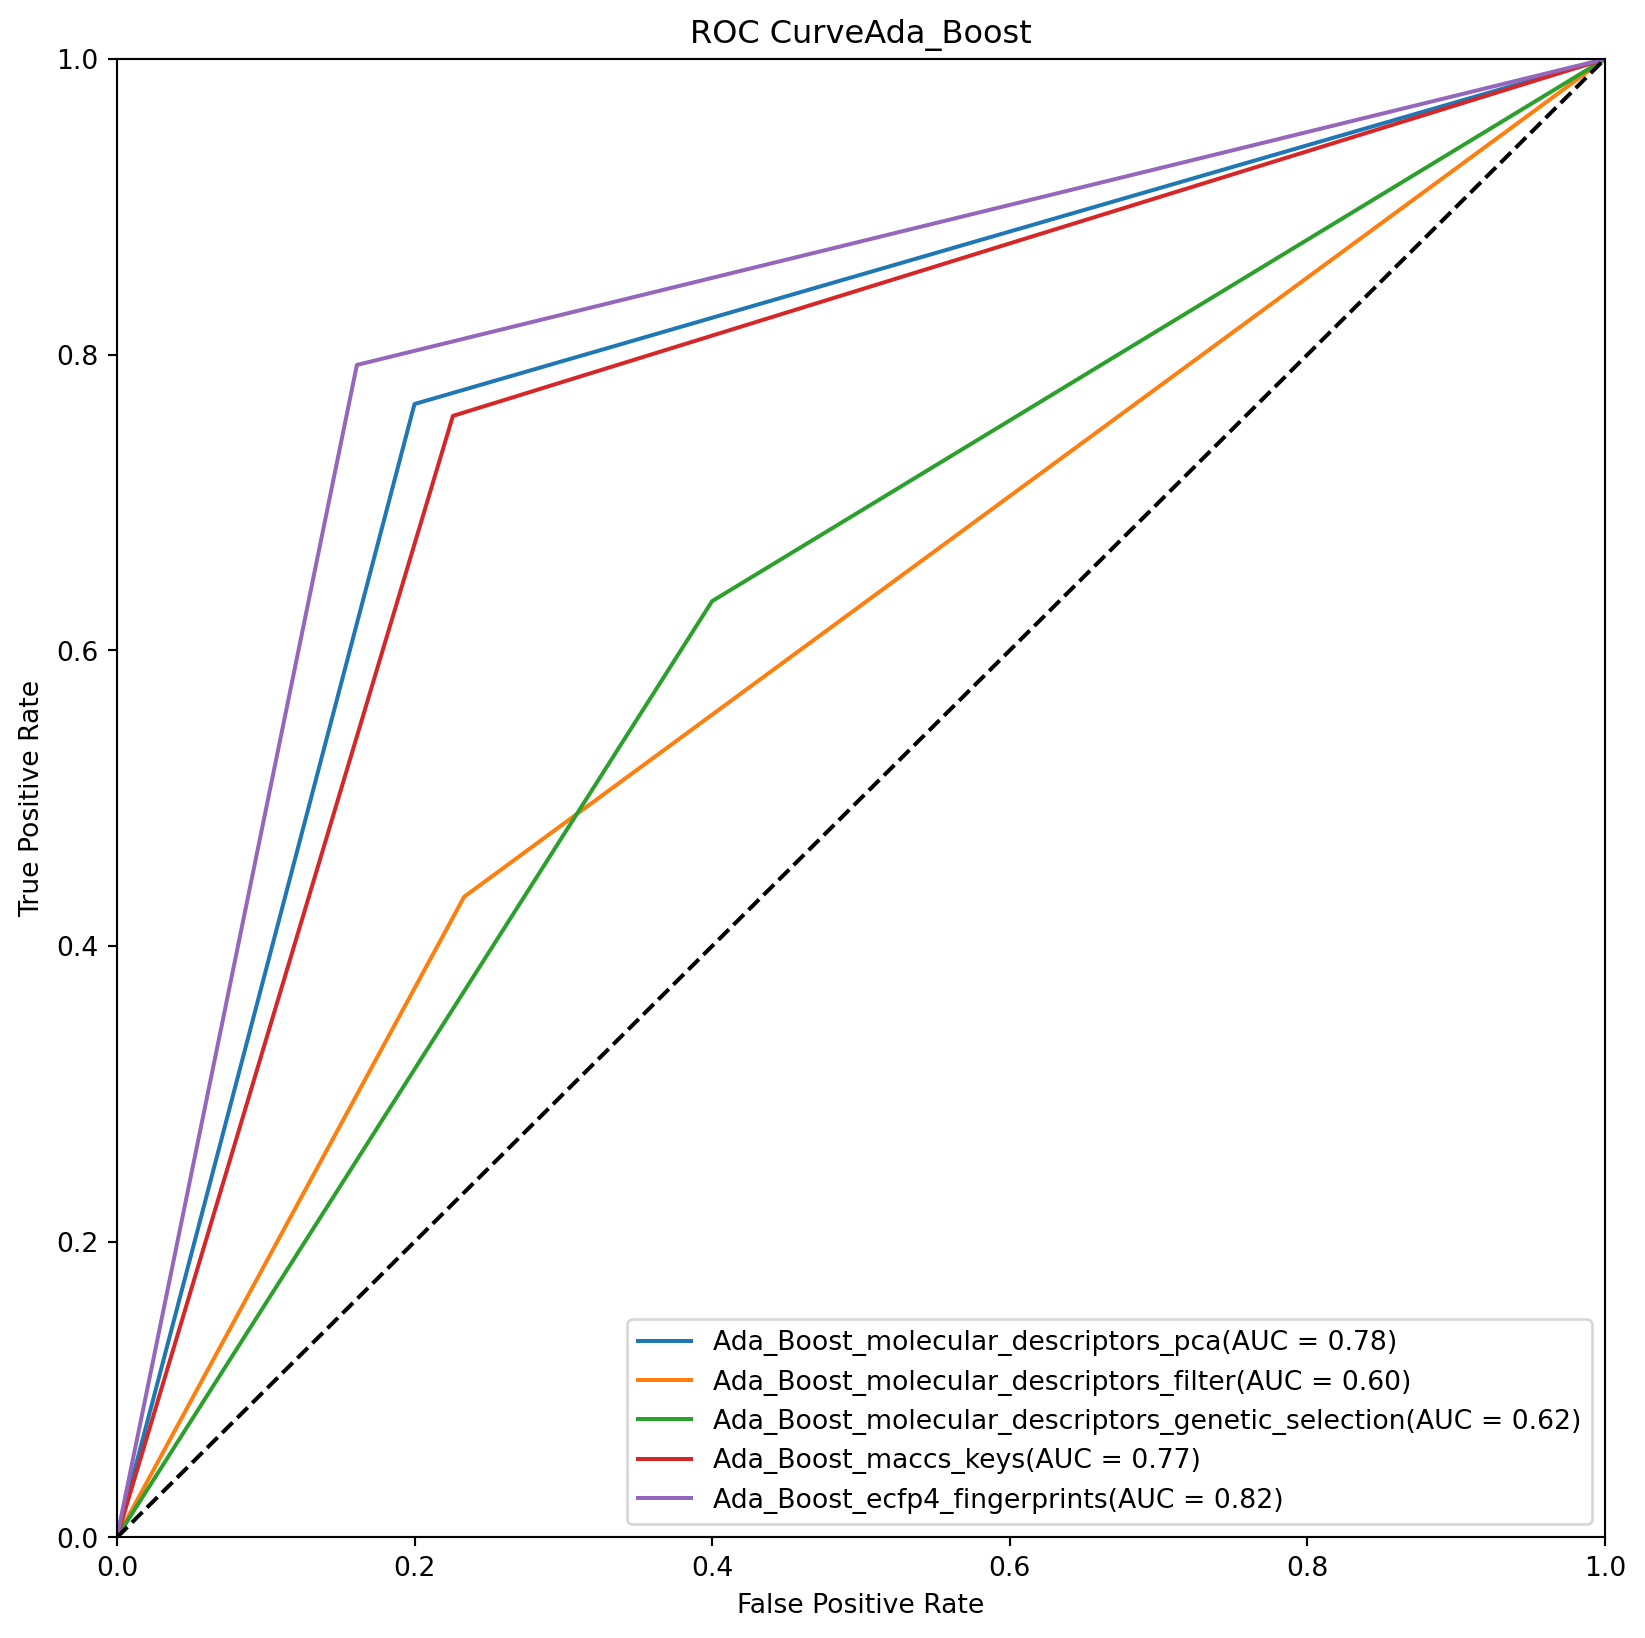

In [16]:
# PLOT ROC CURVES
for model in models_results:
    print(model)
    print(models_results[model])
    roc_curves = models_results[model]
    roc_curve = mu.plot_all_roc_curves(roc_curves=roc_curves, model_name=model)